In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
stream = cv2.VideoCapture(-1) # 0 means read from local camera.
if (stream.isOpened()==False):
    print("Error opeining video stream")
    
prev_frame_time = 0
new_frame_time  = 0

circles = []

## Setting up Pyplot subplot for later use

while(stream.isOpened()):
    try: 
        ret, frame = stream.read()

        # gray = cv2.resize(frame, (500, 300))
        # Converts image to gray
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        ## Setting up font for FPS counte 
        font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
        # FPS timing
        new_frame_time = time.time()
        fps = 1/(new_frame_time-prev_frame_time)
        prev_frame_time = new_frame_time
        # converting the fps into integer
        fps = int(fps)
        # converting the fps to string so that we can display it on frame
        # by using putText function
        fps = str(fps)
        ## Filtering the grayscale image with canny filter
        edges = cv2.Canny(gray, 20, 200)
        circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=10,param2=60,minRadius=25,maxRadius=100)
        if circles is not None:
            Drawing_uncolored_circle=plt.Circle((circles[0], circles[1]),circles[2],fill = False,color='red')
            axes.set_aspect(1)
            axes.add_artist(Drawing_uncolored_circle)
        if ret == True:
            cv2.putText(frame, fps, (7, 70), font, 1, (255, 0, 0), 3, cv2.LINE_AA)
            cv2.imshow('Frame',gray)
            if cv2.waitKey(25) & 0xff == ord('q'):
                break
        else:
            break
    except:
        stream.release()
        cv2.destroyAllWindows()

## Release video capture object 
stream.release()
## Closes all video winwods
cv2.destroyAllWindows()


In [9]:
import cv2

cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
ret,frame = cap.read() # return a single frame in variable `frame`
cap.release()

cv2.imwrite("here.png",frame)


True

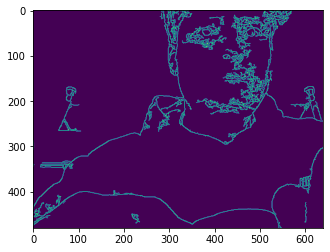

In [14]:
plt.imshow(edges)

None


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

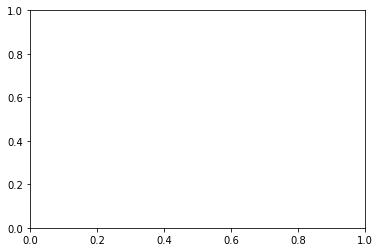

In [15]:
circles = np.squeeze(cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=10,param2=60,minRadius=25,maxRadius=100))
print(circles)
figure, axes = plt.subplots()


Drawing_uncolored_circle=plt.Circle((circles[0],circles[1]),circles[2],fill = False,color='red')
axes.set_aspect(1)
axes.add_artist(Drawing_uncolored_circle)

plt.imshow(frame)

### Doing circle detection using BLOB techniques and thresholding

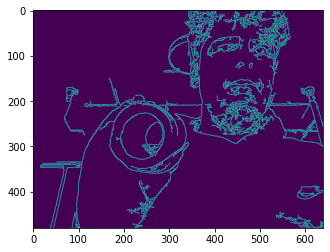

In [16]:
edges = cv2.Canny(gray, 20, 200)
plt.imshow(edges)

### TIl fremtids victor
så problemet ser ud til at være noget array fis, hvis der er mere end 1 værdi så er indexing anderlesed end hvis der er 1 værdi, der er også problemer med at den kan ikke finde ud af at lave en check om der overhovedet er nogen værdier i arrayet til at starte med ? må kunne lave et check der springer plottingen over hvis der ikke er nogen værdier i, også måske bare 2 use cases hvis der er 1 eller flere værdier

### Alternativt !! muligtvis bedre brugt hsv contour combo

https://shrishailsgajbhar.github.io/post/OpenCV-Apple-detection-counting

https://subscription.packtpub.com/book/data/9781789537147/1/ch01lvl1sec09/object-detection-using-color-in-hsv